___
# MINIPROJETO 1

## <font color='red'>Leonardo Fares</font>
___

## <font color='blue'>População Urbana Mundial</font>

___
### Itens 1 a 3 - Resolução:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Leonardo Andrade\Documents\Insper\2° Semestre\Ciência dos Dados\Mini Projeto 1


##### Item 1.

In [2]:
urbanização_dados = pd.read_csv('Urbanização_mundial.csv')
urbanização = pd.DataFrame()
urbanização["População_urbana_mundial"] = urbanização_dados.iloc[0, 4:53]
urbanização.População_urbana_mundial = urbanização.População_urbana_mundial.astype('float')

##### Item 2.

Não há necessidade de limpeza.

##### Item 3.

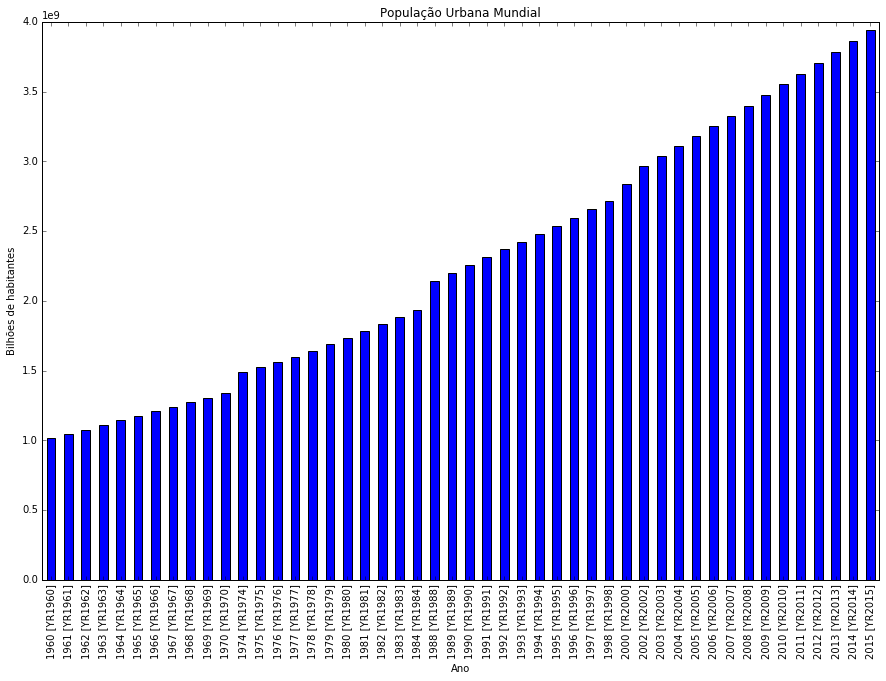

In [3]:
urbanização.População_urbana_mundial.plot(kind='bar',title='População Urbana Mundial',figsize=(15, 10))
plt.ylabel("Bilhões de habitantes")
plt.xlabel("Ano")

___
### Itens 4 a 6 - Resolução:

##### Item 4.

###### Hipotese:
Assimetria negativa

###### Modelo Exponencial:
A função exponencial pode crescer a taxas crescentes, assim como ocorre com a minha amostra de dados.

###### Modelo Logístico:
A taxa de crescimento do modelo logístico é crescente no início e descrescente a partir de um determinado momento. Esse modelo assumiria que, a partir de um dado instante, a população mundial urbana tenderia a estabilizar.

___
### Itens 7 a 9 - Resolução:

___
### Itens 10 e 11 - Resolução: